In [1]:
# import necessary lib
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os

In [2]:
dataset = r'/content/drive/MyDrive/Brain Tumour Dataset'
yes = r'/content/drive/MyDrive/Brain Tumour Dataset/yes'
no = r'/content/drive/MyDrive/Brain Tumour Dataset/no'

In [3]:
labels = ['yes', 'no']

In [4]:
imgs = []
classes = []

In [5]:
for x in labels:
  for y in os.listdir(dataset+'/'+ x):
    imgs.append(dataset+'/'+ x +'/' + y)
    classes.append(x)

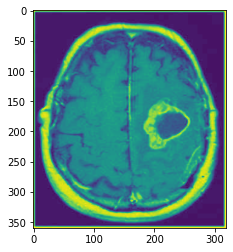

In [6]:
plt.imshow(plt.imread(imgs[0]))
plt.show()

In [7]:
# Dataframe 
df = pd.DataFrame({'Images':imgs, 'Labels':classes}, dtype=str)
df.head()

,Images,Labels
0,/content/drive/MyDrive/Brain Tumour Dataset/ye...,yes
1,/content/drive/MyDrive/Brain Tumour Dataset/ye...,yes
2,/content/drive/MyDrive/Brain Tumour Dataset/ye...,yes
3,/content/drive/MyDrive/Brain Tumour Dataset/ye...,yes
4,/content/drive/MyDrive/Brain Tumour Dataset/ye...,yes


In [8]:
df['Labels'].value_counts()

yes    155
no      98
Name: Labels, dtype: int64

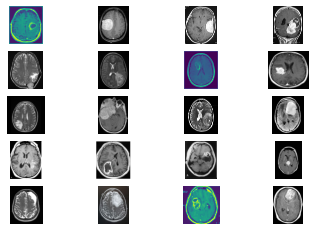

In [13]:
# Display Images
for i in range(0, 20):
  plt.subplot(5, 4, i+1)
  plt.imshow(plt.imread(df['Images'][i]))
  plt.axis('off')
plt.show()


In [9]:
Train, Test = train_test_split(df, train_size=0.9, random_state=0)
Train_new, valid = train_test_split(Train, train_size=0.8, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(227, 2) (26, 2) (181, 2) (46, 2)


In [10]:
train_datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                                   zoom_range=0.2, horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe=Train_new, x_col='Images', y_col='Labels', batch_size=16,
                                             target_size=(64,64), class_mode ='binary', shuffle=True )
valid_gen = train_datagen.flow_from_dataframe(dataframe=valid, x_col='Images', y_col='Labels', batch_size=16,
                                             target_size=(64,64), class_mode ='binary', shuffle=True )
test_gen = train_datagen.flow_from_dataframe(dataframe=Test, x_col='Images', y_col='Labels', batch_size=16,
                                             target_size=(64,64), class_mode ='binary', shuffle=True )

Found 181 validated image filenames belonging to 2 classes.
Found 46 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.


In [ ]:
train_gen[0][0].shape

(16, 64, 64, 3)

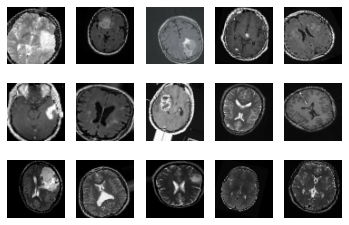

In [ ]:
for i in range(0, 15):
    val = train_gen[0][0][i]
    vals = val.astype('uint8')
    plt.subplot(3,5, i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

In [ ]:
# Network 1 using Dropouts
network1 = Sequential()
network1.add(Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3), kernel_initializer='he_uniform'))
network1.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
network1.add(MaxPool2D(pool_size=(4,4)))
network1.add(Dropout(0.2))
network1.add(Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'))
network1.add(MaxPool2D(pool_size=(4,4)))
network1.add(Dropout(0.2))
network1.add(Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))
network1.add(MaxPool2D(pool_size=(4,4)))
network1.add(Dropout(0.2))
network1.add(Flatten())
network1.add(Dense(1, activation='sigmoid'))
network1.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_191 (Conv2D)         (None, 64, 64, 32)        2432      
                                                                 
 conv2d_192 (Conv2D)         (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_115 (MaxPooli  (None, 16, 16, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_77 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_193 (Conv2D)         (None, 16, 16, 128)       204928    
                                                                 
 max_pooling2d_116 (MaxPooli  (None, 4, 4, 128)        0         
 ng2D)                                               

In [ ]:
#Using SGD Optimizer
network1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(momentum=0.9), metrics=['accuracy'])
history1 = network1.fit(train_gen, epochs=50, validation_data=valid_gen,validation_steps=len(valid_gen), verbose=2)

Epoch 1/50
12/12 - 3s - loss: nan - accuracy: 0.5691 - val_loss: 0.6904 - val_accuracy: 0.5870 - 3s/epoch - 211ms/step
Epoch 2/50
12/12 - 2s - loss: 0.6831 - accuracy: 0.6298 - val_loss: 0.6833 - val_accuracy: 0.5870 - 2s/epoch - 132ms/step
Epoch 3/50
12/12 - 2s - loss: 0.6738 - accuracy: 0.6298 - val_loss: 0.6796 - val_accuracy: 0.5870 - 2s/epoch - 130ms/step
Epoch 4/50
12/12 - 2s - loss: 0.6670 - accuracy: 0.6298 - val_loss: 0.6782 - val_accuracy: 0.5870 - 2s/epoch - 130ms/step
Epoch 5/50
12/12 - 2s - loss: 0.6635 - accuracy: 0.6298 - val_loss: 0.6781 - val_accuracy: 0.5870 - 2s/epoch - 127ms/step
Epoch 6/50
12/12 - 2s - loss: 0.6608 - accuracy: 0.6298 - val_loss: 0.6790 - val_accuracy: 0.5870 - 2s/epoch - 128ms/step
Epoch 7/50
12/12 - 2s - loss: 0.6597 - accuracy: 0.6298 - val_loss: 0.6797 - val_accuracy: 0.5870 - 2s/epoch - 128ms/step
Epoch 8/50
12/12 - 2s - loss: 0.6596 - accuracy: 0.6298 - val_loss: 0.6800 - val_accuracy: 0.5870 - 2s/epoch - 125ms/step
Epoch 9/50
12/12 - 2s - los

In [ ]:
# Network 2 with BatchNormalization
network2 = Sequential()
network2.add(Conv2D(filters=64, padding='same', kernel_size=(5,5), activation='relu', input_shape=(64, 64, 3), kernel_initializer='he_uniform'))
network2.add(Conv2D(filters=128, padding='same', kernel_size=(5,5), activation='relu' ))
network2.add(MaxPool2D(pool_size=(4,4)))
network2.add(BatchNormalization())
network2.add(Conv2D(filters=128, padding='same', kernel_size=(5,5), activation='relu'))
network2.add(MaxPool2D(pool_size=(4,4)))
network2.add(BatchNormalization())
network2.add(Conv2D(filters=128, padding='same', kernel_size=(5,5), activation='relu'))
network2.add(MaxPool2D(pool_size=(4,4)))
network2.add(BatchNormalization())
network2.add(Flatten())
network2.add(Dense(1,activation='sigmoid'))
network2.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_195 (Conv2D)         (None, 64, 64, 64)        4864      
                                                                 
 conv2d_196 (Conv2D)         (None, 64, 64, 128)       204928    
                                                                 
 max_pooling2d_118 (MaxPooli  (None, 16, 16, 128)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_44 (Bat  (None, 16, 16, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_197 (Conv2D)         (None, 16, 16, 128)       409728    
                                                                 
 max_pooling2d_119 (MaxPooli  (None, 4, 4, 128)      

In [ ]:
network2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'], loss='binary_crossentropy')
history2 = network2.fit(train_gen, validation_data=valid_gen, epochs=50, verbose=2)

Epoch 1/50
12/12 - 58s - loss: 1.8745 - accuracy: 0.5414 - val_loss: 741.1305 - val_accuracy: 0.4130 - 58s/epoch - 5s/step
Epoch 2/50
12/12 - 2s - loss: 0.7455 - accuracy: 0.6906 - val_loss: 109.8575 - val_accuracy: 0.4130 - 2s/epoch - 129ms/step
Epoch 3/50
12/12 - 2s - loss: 0.6791 - accuracy: 0.6851 - val_loss: 48.6632 - val_accuracy: 0.4130 - 2s/epoch - 132ms/step
Epoch 4/50
12/12 - 2s - loss: 0.6123 - accuracy: 0.6851 - val_loss: 11.7932 - val_accuracy: 0.4130 - 2s/epoch - 134ms/step
Epoch 5/50
12/12 - 2s - loss: 0.6736 - accuracy: 0.6796 - val_loss: 14.4823 - val_accuracy: 0.4130 - 2s/epoch - 132ms/step
Epoch 6/50
12/12 - 2s - loss: 0.6107 - accuracy: 0.6796 - val_loss: 8.8835 - val_accuracy: 0.4130 - 2s/epoch - 133ms/step
Epoch 7/50
12/12 - 2s - loss: 0.6270 - accuracy: 0.6961 - val_loss: 2.3631 - val_accuracy: 0.4348 - 2s/epoch - 129ms/step
Epoch 8/50
12/12 - 2s - loss: 0.6216 - accuracy: 0.6796 - val_loss: 6.3661 - val_accuracy: 0.4130 - 2s/epoch - 131ms/step
Epoch 9/50
12/12 -

In [ ]:
# Network3 with Regularization 
network3 = Sequential()
network3.add(Conv2D(32, kernel_size= (5,5), padding='same', activation='relu', input_shape=(64, 64, 3), kernel_regularizer=l2(0.01)))
network3.add(Conv2D(64, (5,5), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
network3.add(MaxPool2D(pool_size=(4,4)))
network3.add(Conv2D(128, (5,5), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
network3.add(MaxPool2D(pool_size=(4,4)))
network3.add(Conv2D(128, (5,5), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
network3.add(MaxPool2D(pool_size=(4,4)))
network3.add(Flatten())
network3.add(Dense(1, activation='sigmoid'))
network3.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_199 (Conv2D)         (None, 64, 64, 32)        2432      
                                                                 
 conv2d_200 (Conv2D)         (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_121 (MaxPooli  (None, 16, 16, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_201 (Conv2D)         (None, 16, 16, 128)       204928    
                                                                 
 max_pooling2d_122 (MaxPooli  (None, 4, 4, 128)        0         
 ng2D)                                                           
                                                                 
 conv2d_202 (Conv2D)         (None, 4, 4, 128)       

In [ ]:
network3.compile(optimizer=Adam(lr=0.1), loss = 'binary_crossentropy', metrics=['accuracy'])
history3 = network3.fit(train_gen, validation_data=valid_gen, validation_steps=len(valid_gen), batch_size=64, epochs = 50, verbose=2)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 - 3s - loss: 8635973.0000 - accuracy: 0.5470 - val_loss: 691.0486 - val_accuracy: 0.5652 - 3s/epoch - 221ms/step
Epoch 2/50
12/12 - 2s - loss: 825.7971 - accuracy: 0.6298 - val_loss: 913.4926 - val_accuracy: 0.5870 - 2s/epoch - 126ms/step
Epoch 3/50
12/12 - 2s - loss: 910.3957 - accuracy: 0.6298 - val_loss: 887.8364 - val_accuracy: 0.6304 - 2s/epoch - 127ms/step
Epoch 4/50
12/12 - 1s - loss: 853.9212 - accuracy: 0.6243 - val_loss: 814.7404 - val_accuracy: 0.5870 - 1s/epoch - 123ms/step
Epoch 5/50
12/12 - 2s - loss: 784.5292 - accuracy: 0.6298 - val_loss: 748.1035 - val_accuracy: 0.5870 - 2s/epoch - 125ms/step
Epoch 6/50
12/12 - 1s - loss: 723.3005 - accuracy: 0.6409 - val_loss: 696.2911 - val_accuracy: 0.5870 - 1s/epoch - 125ms/step
Epoch 7/50
12/12 - 1s - loss: 677.5966 - accuracy: 0.6298 - val_loss: 658.0383 - val_accuracy: 0.5652 - 1s/epoch - 124ms/step
Epoch 8/50
12/12 - 1s - loss: 643.8126 - accuracy: 0.6243 - val_loss: 627.8421 - val_accuracy: 0.5870 - 1s/epoch - 122ms/step

In [ ]:
# Network 4 with BatchNormalization and Dropouts
network4 = Sequential()
network4.add(Conv2D(filters=64, padding='same', kernel_size=(5,5), activation='relu', input_shape=(64, 64, 3), kernel_initializer='he_uniform'))
network4.add(MaxPool2D(pool_size=(4,4)))
network4.add(BatchNormalization())
network4.add(Dropout(0.2))
network4.add(Conv2D(filters=128, padding='same', kernel_size=(5,5), activation='relu'))
network4.add(MaxPool2D(pool_size=(4,4)))
network4.add(Dropout(0.2))
network4.add(Conv2D(filters=128, padding='same', kernel_size=(5,5), activation='relu'))
network4.add(MaxPool2D(pool_size=(4,4)))
network4.add(BatchNormalization())
network4.add(Flatten())
network4.add(Dense(1,activation='sigmoid'))
network4.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_203 (Conv2D)         (None, 64, 64, 64)        4864      
                                                                 
 max_pooling2d_124 (MaxPooli  (None, 16, 16, 64)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_47 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_80 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_204 (Conv2D)         (None, 16, 16, 128)       204928    
                                                                 
 max_pooling2d_125 (MaxPooli  (None, 4, 4, 128)      

In [ ]:
network4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'], loss='binary_crossentropy')
history4 = network4.fit(train_gen, validation_data=valid_gen, epochs=50, verbose=2)

Epoch 1/50
12/12 - 3s - loss: 1.1374 - accuracy: 0.6575 - val_loss: 33.6936 - val_accuracy: 0.5870 - 3s/epoch - 214ms/step
Epoch 2/50
12/12 - 1s - loss: 0.8128 - accuracy: 0.6188 - val_loss: 23.0270 - val_accuracy: 0.5870 - 1s/epoch - 123ms/step
Epoch 3/50
12/12 - 1s - loss: 0.7133 - accuracy: 0.6685 - val_loss: 11.0903 - val_accuracy: 0.5870 - 1s/epoch - 119ms/step
Epoch 4/50
12/12 - 1s - loss: 0.6143 - accuracy: 0.6519 - val_loss: 3.1454 - val_accuracy: 0.5870 - 1s/epoch - 123ms/step
Epoch 5/50
12/12 - 1s - loss: 0.5596 - accuracy: 0.7293 - val_loss: 3.7036 - val_accuracy: 0.3913 - 1s/epoch - 118ms/step
Epoch 6/50
12/12 - 1s - loss: 0.6135 - accuracy: 0.6796 - val_loss: 3.3467 - val_accuracy: 0.5870 - 1s/epoch - 120ms/step
Epoch 7/50
12/12 - 1s - loss: 0.5362 - accuracy: 0.7459 - val_loss: 1.3312 - val_accuracy: 0.6739 - 1s/epoch - 120ms/step
Epoch 8/50
12/12 - 1s - loss: 0.5224 - accuracy: 0.7348 - val_loss: 0.5962 - val_accuracy: 0.7174 - 1s/epoch - 119ms/step
Epoch 9/50
12/12 - 1s

In [ ]:
# Network 5 with BatchNormalization and Dropouts
network5 = Sequential()
network5.add(Conv2D(filters=32, padding='same', kernel_size=(5,5), activation='relu', input_shape=(64, 64, 3), kernel_initializer='he_uniform'))
network5.add(Conv2D(filters=64, padding='same', kernel_size=(5,5), activation='relu' ))
network5.add(MaxPool2D(pool_size=(4,4)))
network5.add(Dropout(0.2))
network5.add(Conv2D(filters=128, padding='same', kernel_size=(7,7), activation='relu'))
network5.add(MaxPool2D(pool_size=(4,4)))
network5.add(Dropout(0.2))
network5.add(Conv2D(filters=256, padding='same', kernel_size=(7,7), activation='relu'))
network5.add(MaxPool2D(pool_size=(4,4)))
network5.add(BatchNormalization())
network5.add(Flatten())
network5.add(Dense(1,activation='sigmoid'))
network5.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_206 (Conv2D)         (None, 64, 64, 32)        2432      
                                                                 
 conv2d_207 (Conv2D)         (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_127 (MaxPooli  (None, 16, 16, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_82 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_208 (Conv2D)         (None, 16, 16, 128)       401536    
                                                                 
 max_pooling2d_128 (MaxPooli  (None, 4, 4, 128)        0         
 ng2D)                                               

In [ ]:
network5.compile(optimizer= Adam(learning_rate=0.1), metrics=['accuracy'], loss='binary_crossentropy')
history5 = network5.fit(train_gen, validation_data=valid_gen, epochs=50, verbose=2)

Epoch 1/50
12/12 - 3s - loss: 3.2212 - accuracy: 0.6409 - val_loss: 7.2473 - val_accuracy: 0.4130 - 3s/epoch - 222ms/step
Epoch 2/50
12/12 - 2s - loss: 1.1317 - accuracy: 0.5912 - val_loss: 11.6467 - val_accuracy: 0.5870 - 2s/epoch - 129ms/step
Epoch 3/50
12/12 - 2s - loss: 0.7024 - accuracy: 0.6133 - val_loss: 5.9424 - val_accuracy: 0.5870 - 2s/epoch - 128ms/step
Epoch 4/50
12/12 - 2s - loss: 0.6471 - accuracy: 0.6740 - val_loss: 2.4465 - val_accuracy: 0.5870 - 2s/epoch - 127ms/step
Epoch 5/50
12/12 - 2s - loss: 0.6090 - accuracy: 0.6851 - val_loss: 2.6251 - val_accuracy: 0.5870 - 2s/epoch - 130ms/step
Epoch 6/50
12/12 - 2s - loss: 0.6043 - accuracy: 0.6906 - val_loss: 2.5658 - val_accuracy: 0.5870 - 2s/epoch - 129ms/step
Epoch 7/50
12/12 - 2s - loss: 0.6076 - accuracy: 0.6796 - val_loss: 0.6331 - val_accuracy: 0.6304 - 2s/epoch - 130ms/step
Epoch 8/50
12/12 - 2s - loss: 0.5662 - accuracy: 0.7238 - val_loss: 2.3174 - val_accuracy: 0.5870 - 2s/epoch - 130ms/step
Epoch 9/50
12/12 - 2s -

In [ ]:
histories = [history1, history2, history3, history4, history5]

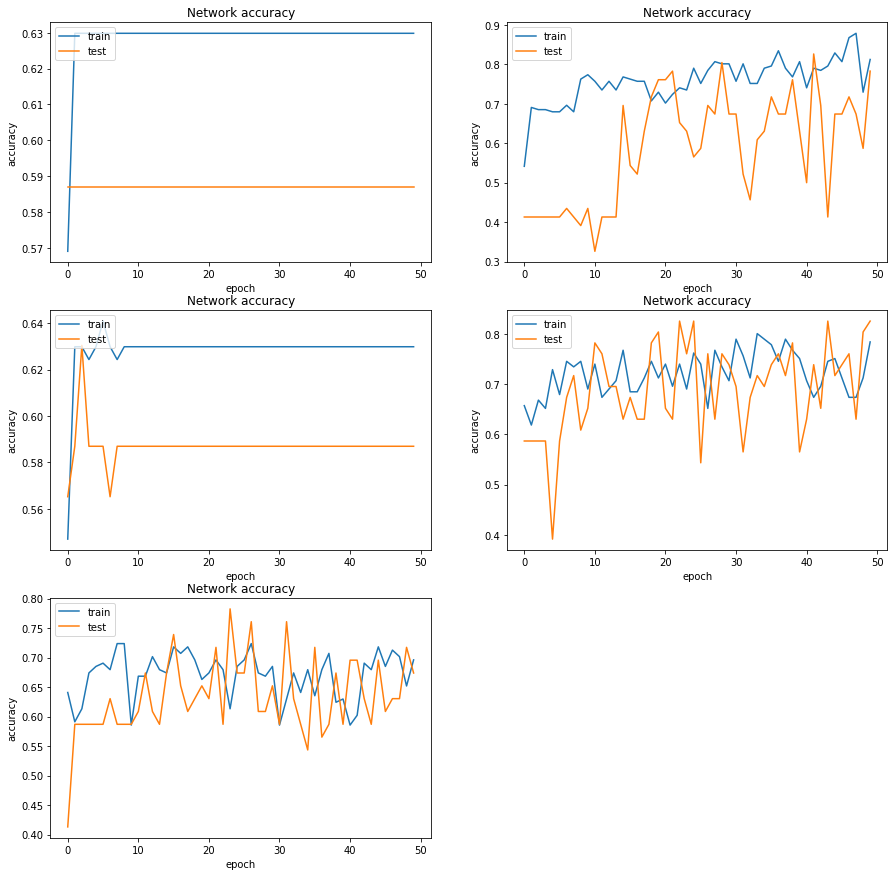

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(len(histories)):
  plt.subplot(3,2, i+1)
  plt.plot(histories[i].history['accuracy'])
  plt.plot(histories[i].history['val_accuracy'])
  plt.title('Network accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
plt.show() 


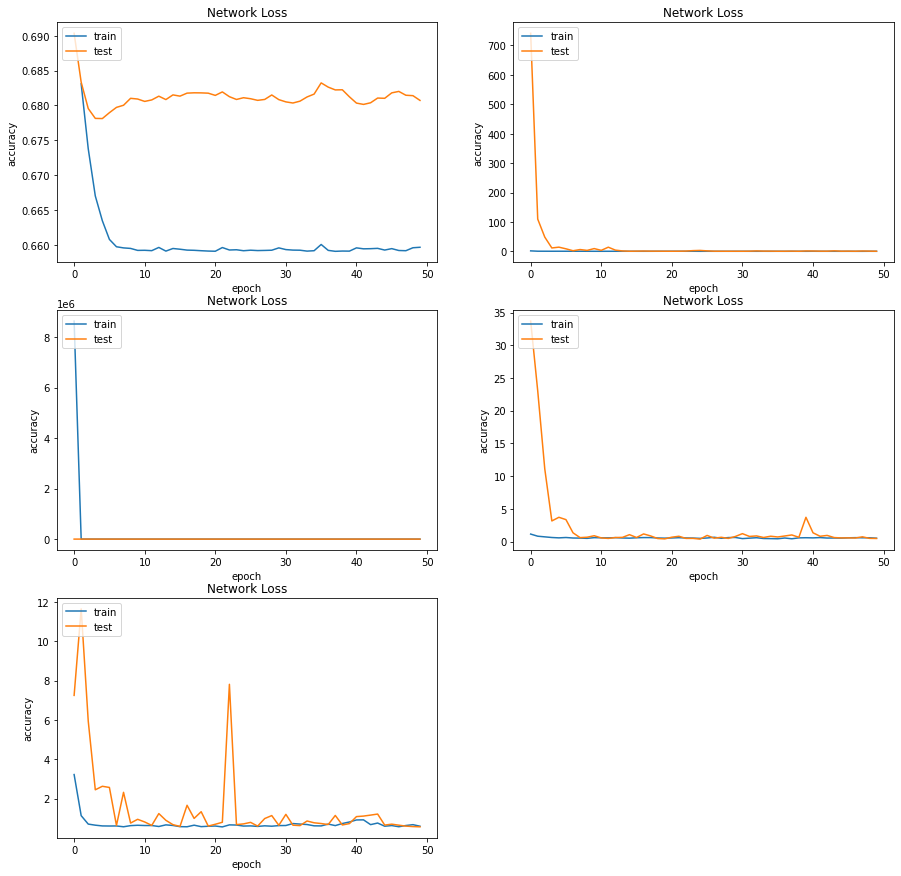

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(len(histories)):
  plt.subplot(3,2, i+1)
  plt.plot(histories[i].history['loss'])
  plt.plot(histories[i].history['val_loss'])
  plt.title('Network Loss')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
plt.show() 

Using Pre-Trained Models 

In [16]:
train_datagen = ImageDataGenerator (rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                                   zoom_range=0.2, horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [17]:
# Changing shape of image to 224*224*3
train_gen = train_datagen.flow_from_dataframe(dataframe=Train_new, x_col='Images', y_col='Labels', batch_size=16,
                                             target_size=(224,224), class_mode ='binary', shuffle=True )
valid_gen = train_datagen.flow_from_dataframe(dataframe=valid, x_col='Images', y_col='Labels', batch_size=16,
                                             target_size=(224, 224), class_mode ='binary', shuffle=True )
test_gen = train_datagen.flow_from_dataframe(dataframe=Test, x_col='Images', y_col='Labels', batch_size=16,
                                             target_size=(224, 224), class_mode ='binary', shuffle=True )

Found 181 validated image filenames belonging to 2 classes.
Found 46 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.


In [18]:
train_gen[0][0].shape

(16, 224, 224, 3)

In [19]:
base_model = VGG16(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224, 224, 3), classes=2)
vgg16 = Sequential()
vgg16.add(base_model)
vgg16.add(Dropout(0.3))
vgg16.add(Flatten())
vgg16.add(Dropout(0.5))
vgg16.add(Dense(1, activation='sigmoid'))
vgg16.layers[0].trainable = False

In [20]:
vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_5 (Dropout)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
vgg16.compile(optimizer= Adam(lr=0.1,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), loss = 'binary_crossentropy', metrics=['accuracy'])
vgg16_history = vgg16.fit(train_gen, validation_data=valid_gen, validation_steps=len(valid_gen), epochs=10, batch_size=64,
                          )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
12/12 [==============================] - 17s 968ms/step - loss: 186.6049 - accuracy: 0.6243 - val_loss: 119.9462 - val_accuracy: 0.7826
Epoch 2/10
12/12 [==============================] - 4s 347ms/step - loss: 205.0781 - accuracy: 0.7624 - val_loss: 143.8695 - val_accuracy: 0.8261
Epoch 3/10
12/12 [==============================] - 4s 345ms/step - loss: 267.4190 - accuracy: 0.7569 - val_loss: 150.3475 - val_accuracy: 0.8043
Epoch 4/10
12/12 [==============================] - 4s 358ms/step - loss: 199.9126 - accuracy: 0.7901 - val_loss: 182.4465 - val_accuracy: 0.7609
Epoch 5/10
12/12 [==============================] - 4s 360ms/step - loss: 206.0427 - accuracy: 0.8122 - val_loss: 238.0294 - val_accuracy: 0.8478
Epoch 6/10
12/12 [==============================] - 4s 351ms/step - loss: 205.9995 - accuracy: 0.7956 - val_loss: 201.0894 - val_accuracy: 0.8043
Epoch 7/10
12/12 [==============================] - 4s 357ms/step - loss: 169.6342 - accuracy: 0.8508 - val_loss: 131.3689 

In [26]:
# Changing shape of image to 128*128*3
train_gen = train_datagen.flow_from_dataframe(dataframe=Train_new, x_col='Images', y_col='Labels', batch_size=16,
                                             target_size=(128, 128), class_mode ='binary', shuffle=True )
valid_gen = train_datagen.flow_from_dataframe(dataframe=valid, x_col='Images', y_col='Labels', batch_size=16,
                                             target_size=(128, 128), class_mode ='binary', shuffle=True )
test_gen = train_datagen.flow_from_dataframe(dataframe=Test, x_col='Images', y_col='Labels', batch_size=16,
                                             target_size=(128, 128), class_mode ='binary', shuffle=True )

Found 181 validated image filenames belonging to 2 classes.
Found 46 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.


In [13]:
base_model = VGG19(include_top=False, input_shape=(128, 128, 3), classes=2, weights='imagenet')
vgg19 = Sequential()
vgg19.add(base_model)
vgg19.add(Dropout(0.3))
vgg19.add(Flatten())
vgg19.add(Dropout(0.5))
vgg19.add(Dense(1, activation='sigmoid'))
vgg19.layers[0].trainable = False

In [14]:
vgg19.compile(optimizer= Adam(learning_rate=0.1), loss = 'binary_crossentropy', metrics=['accuracy'])
vgg19_history = vgg19.fit(train_gen, validation_data=valid_gen, validation_steps=len(valid_gen), epochs=10, batch_size=64)

Epoch 1/10
12/12 [==============================] - 10s 477ms/step - loss: 107.1646 - accuracy: 0.5967 - val_loss: 116.6040 - val_accuracy: 0.7174
Epoch 2/10
12/12 [==============================] - 2s 190ms/step - loss: 102.6992 - accuracy: 0.7182 - val_loss: 48.0493 - val_accuracy: 0.8913
Epoch 3/10
12/12 [==============================] - 2s 191ms/step - loss: 85.6996 - accuracy: 0.7845 - val_loss: 56.2974 - val_accuracy: 0.8043
Epoch 4/10
12/12 [==============================] - 2s 194ms/step - loss: 94.6433 - accuracy: 0.7735 - val_loss: 87.1498 - val_accuracy: 0.8043
Epoch 5/10
12/12 [==============================] - 2s 194ms/step - loss: 100.9855 - accuracy: 0.7459 - val_loss: 112.0563 - val_accuracy: 0.7391
Epoch 6/10
12/12 [==============================] - 2s 192ms/step - loss: 117.9695 - accuracy: 0.7735 - val_loss: 106.7390 - val_accuracy: 0.8696
Epoch 7/10
12/12 [==============================] - 2s 194ms/step - loss: 98.1658 - accuracy: 0.8011 - val_loss: 105.8152 - val_

In [27]:
base_model = ResNet50(
    include_top=False,
    weights = 'imagenet', classes=2, input_shape=(128, 128, 3))
resnet50 = Sequential()
resnet50.add(base_model)
resnet50.add(Dropout(0.3))
resnet50.add(Flatten())
resnet50.add(Dropout(0.5))
resnet50.add(Dense(1, activation='sigmoid'))
resnet50.layers[0].trainable = False

In [28]:
resnet50.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 dropout_8 (Dropout)         (None, 4, 4, 2048)        0         
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dropout_9 (Dropout)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 32769     
                                                                 
Total params: 23,620,481
Trainable params: 32,769
Non-trainable params: 23,587,712
_________________________________________________________________


In [29]:
resnet50.compile(optimizer= Adam(lr=0.1,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), loss = 'binary_crossentropy', metrics=['accuracy'])
resnet50_history = resnet50.fit(train_gen, validation_data=valid_gen, validation_steps=len(valid_gen), epochs=10, batch_size=64)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
12/12 [==============================] - 9s 375ms/step - loss: 76.7762 - accuracy: 0.6575 - val_loss: 27.1692 - val_accuracy: 0.8696
Epoch 2/10
12/12 [==============================] - 2s 190ms/step - loss: 59.8497 - accuracy: 0.8066 - val_loss: 43.6693 - val_accuracy: 0.8261
Epoch 3/10
12/12 [==============================] - 2s 191ms/step - loss: 51.4494 - accuracy: 0.8287 - val_loss: 50.7916 - val_accuracy: 0.8478
Epoch 4/10
12/12 [==============================] - 2s 191ms/step - loss: 73.9857 - accuracy: 0.7459 - val_loss: 12.7879 - val_accuracy: 0.8696
Epoch 5/10
12/12 [==============================] - 2s 195ms/step - loss: 31.5800 - accuracy: 0.8619 - val_loss: 40.6352 - val_accuracy: 0.8913
Epoch 6/10
12/12 [==============================] - 2s 192ms/step - loss: 32.8018 - accuracy: 0.8564 - val_loss: 71.3579 - val_accuracy: 0.7174
Epoch 7/10
12/12 [==============================] - 2s 203ms/step - loss: 67.9681 - accuracy: 0.7956 - val_loss: 116.6537 - val_accuracy

In [30]:
histories = [vgg16_history, vgg19_history, resnet50_history]
Models = ['VGG16', 'VGG19', 'ResNet50']

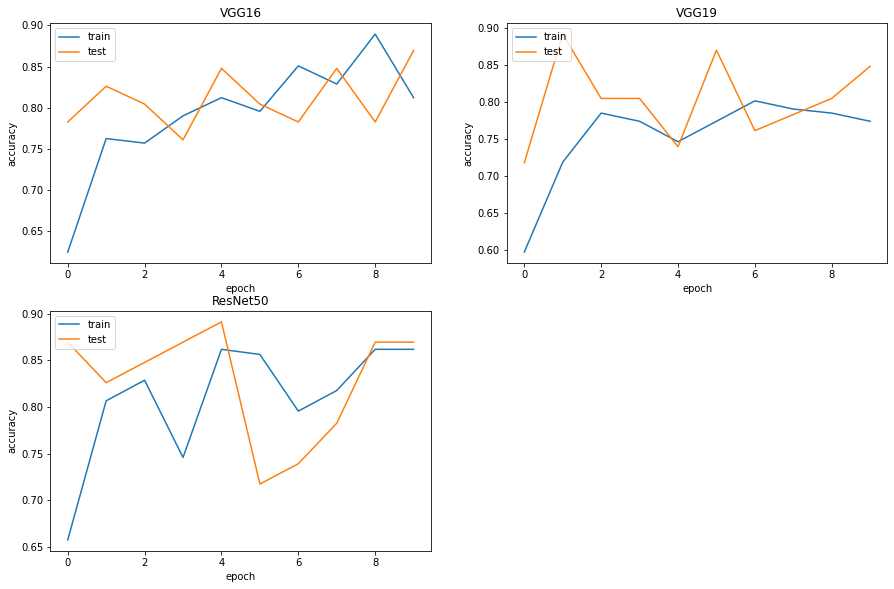

In [31]:
plt.figure(figsize=(15, 15))
for i in range(len(histories)):
  plt.subplot(3,2, i+1)
  plt.plot(histories[i].history['accuracy'])
  plt.plot(histories[i].history['val_accuracy'])
  plt.title(Models[i])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
plt.show() 

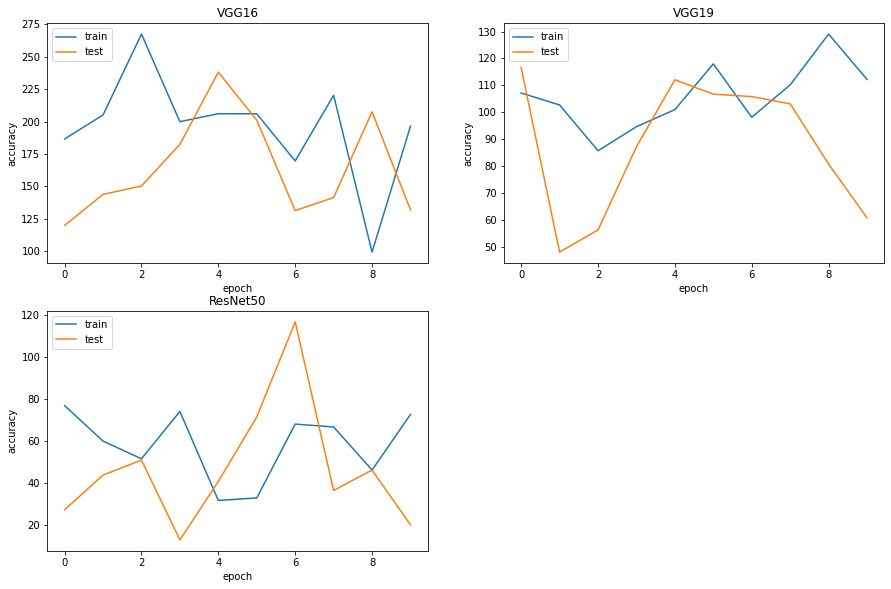

In [32]:
plt.figure(figsize=(15, 15))
for i in range(len(histories)):
  plt.subplot(3,2, i+1)
  plt.plot(histories[i].history['loss'])
  plt.plot(histories[i].history['val_loss'])
  plt.title(Models[i])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
plt.show() 